# Unit 5 - Financial Planning


In [18]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [25]:
# Load .env enviroment variables
load_dotenv()
## Already loaded via bash profile but not working for some reason

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [26]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!

In [27]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [28]:
# Fetch current BTC price
# sending get request and saving the response as response object 
r = requests.get(url = btc_url)
  
# extracting data in json format 
btc_data = r.json() 
btc_data
# YOUR CODE HERE!

btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]

r = requests.get(url = eth_url)
  
# extracting data in json format 
eth_data = r.json() 
eth_data

eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = btc_price*my_btc

my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20248.08
The current value of your 5.3 ETH is $2855.49


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [29]:
# Current amount of shares
# YOUR CODE HERE!

my_agg = 200
my_spy = 50

In [30]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(
   alpaca_api_key,
   alpaca_secret_key,
   api_version = "v2"
)

type(alpaca_api_key)
alpaca_api_key

'PKMHTF8JYUP05VFB9Y9L'

In [31]:
# Format current date as ISO format
# YOUR CODE HERE!
# Set start and end datetimes of 1 year, between now and 365 days ago.
today = pd.Timestamp("2020-10-20", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# get_barset
df_ticker = api.get_barset(
    ticker,
    timeframe,
    start=today,
    end=today
).df

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
# See cell 32

# Preview DataFrame
# YOUR CODE HERE!

df_ticker.head(10)

AGG                                      SPY  \
                            open    high     low   close   volume    open   
2020-10-20 00:00:00-04:00  117.7  117.71  117.58  117.64  3624855  343.46   

                                                             
                             high     low   close    volume  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34  48206853

In [32]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = df_closing_prices["AGG"][0]

spy_close_price = df_closing_prices["SPY"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $343.34


In [33]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy*spy_close_price

my_agg_value = my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17167.00
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [55]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
shares = my_agg_value+my_spy_value
crypto = my_btc_value+my_eth_value
amount = [crypto],[shares]
df_savings = pd.DataFrame(amount, index=['crypto', 'shares'], columns=['amount'])

#df_savings(columns =['amount'], index=['crypto', 'shares'])
#columns=["amount"], index=["crypto", "shares"]

# Display savings DataFrame
##display(df_savings)
df_savings

,amount
crypto,23103.573525
shares,40695.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

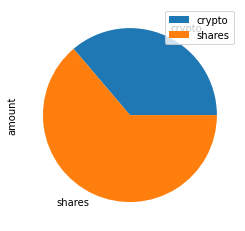

In [58]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(subplots=True)

In [65]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

savings = shares+crypto

# Validate saving health
# YOUR CODE HERE

if savings > emergency_fund:
    print(f"Congratulations! You have enough money in this fund.")
elif savings == emergency_fund:
    print(f"Congratulations! You have reached this financial goal.")
elif savings < emergency_fund:
    print(f"Attention! You are ${(emergency_fund)-(savings)} away from reaching the goal.")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [69]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-20', tz='America/New_York').isoformat()

In [70]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
# df_daily_returns.plot.hist(alpha=0.5)

# Get 5 year's worth of historical price data

## Set the ticker information
ticker = ["AGG","SPY"]

df_stock_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562  202.85   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   

                                                                
                             high       low   close     volume  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.3000  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.5600  206.97   51484043

In [74]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [75]:
# Printing the simulation input data
# YOUR CODE HERE!

MC_thirtyyear.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [76]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997864,1.007038,1.000272,0.996192,1.020069,0.990899,0.988613,0.994454,0.994010,1.007109,...,0.986455,0.993708,0.994091,0.990584,1.006461,1.001375,0.998486,1.008713,0.985338,1.001218
2,1.000283,1.004918,1.002311,0.988785,1.022684,0.995812,0.987289,0.999839,0.981137,1.009663,...,0.979098,0.998957,1.005246,0.993094,1.014650,1.006719,1.008596,1.012963,0.981159,1.005294
3,1.001827,1.001679,1.004257,0.997509,1.027772,0.989651,0.977627,1.004393,0.970498,1.010621,...,0.982285,0.991621,0.997472,0.998429,1.024569,1.010056,1.019653,1.020398,0.977874,0.987821
4,0.998956,1.008215,1.006641,0.979816,1.024249,0.989603,0.967140,1.011901,0.965231,1.000850,...,0.999079,0.994653,1.006460,0.994324,1.025810,1.022725,1.012017,1.018666,0.983760,0.987697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.983500,76.720474,11.546587,10.949342,4.978824,5.979715,2.690824,9.166598,6.871518,13.251603,...,9.917895,14.038454,4.914757,5.468670,7.042415,8.328209,5.099866,10.916458,2.926499,9.999486
7557,22.333468,77.355632,11.578767,10.943132,5.022102,6.013262,2.695098,9.185696,6.986774,13.218284,...,9.924689,14.020623,4.949779,5.492985,7.005796,8.359201,5.137008,10.892070,2.939916,10.087640
7558,22.387157,78.095851,11.516952,10.846312,5.038545,6.008013,2.695036,9.149129,7.053772,13.330871,...,9.929227,14.126017,4.993877,5.593554,6.992577,8.260173,5.105313,10.799764,2.950169,9.995970
7559,22.412905,78.028160,11.467722,10.869632,5.063866,5.905344,2.669783,9.074275,7.041784,13.197844,...,9.866657,14.030453,4.979661,5.606494,6.933025,8.332904,5.086576,10.988076,2.957958,10.139197


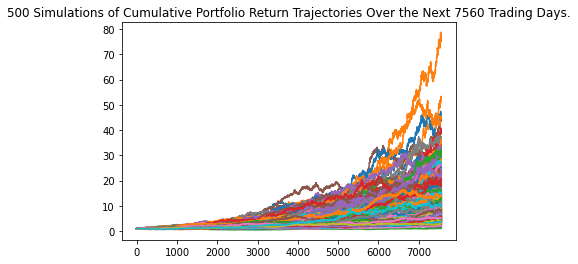

In [77]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_thirtyyear.plot_simulation()

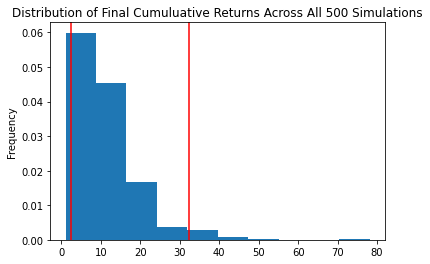

In [78]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             11.466105
std               8.236872
min               1.088274
25%               5.673472
50%               9.420599
75%              14.668222
max              78.183523
95% CI Lower      2.565289
95% CI Upper     32.467945
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [80]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51305.79 and $649358.9


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76958.68 and $974038.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [82]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [83]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012121,1.003859,1.001627,0.999355,0.999997,1.005429,0.993702,1.002242,0.991649,0.995688,...,1.001708,0.992264,1.006615,0.994084,1.007151,0.987508,0.990125,1.007029,1.006833,0.995005
2,1.015128,1.005287,0.998563,0.995576,0.991005,1.008107,0.976738,1.015445,1.008780,0.993700,...,1.005099,0.994875,1.001157,1.000804,0.997504,0.986404,1.001854,1.008990,1.008338,0.991361
3,1.018103,1.015312,0.988888,1.005277,0.992667,1.002094,0.983967,1.004034,0.997601,0.985508,...,1.011698,1.001748,0.990569,1.003014,0.979837,0.992107,0.992498,1.014442,1.016261,0.986685
4,1.018429,0.996671,0.983735,1.006421,0.989395,0.997256,0.970422,1.006678,0.992701,0.988193,...,1.010587,1.008320,0.983437,0.993916,0.983820,0.983829,0.978659,1.012912,1.016943,0.981336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.224787,1.704363,1.794397,1.603351,1.347772,2.008732,1.240941,0.810787,1.593128,2.200714,...,1.456984,1.278791,0.864863,1.117494,1.027979,1.074052,1.189569,1.629908,1.265586,0.977018
1257,1.236357,1.730026,1.783842,1.610315,1.346138,2.006211,1.239465,0.806715,1.581287,2.175634,...,1.480511,1.268451,0.855891,1.111457,1.028624,1.081735,1.201570,1.616052,1.279553,0.976005
1258,1.230502,1.737957,1.766295,1.600469,1.339884,1.999085,1.246869,0.800545,1.600050,2.156179,...,1.496906,1.258358,0.860185,1.133847,1.034790,1.091027,1.211528,1.614125,1.293135,0.983834
1259,1.240967,1.747501,1.789583,1.606064,1.335661,2.005835,1.257773,0.795821,1.620561,2.148831,...,1.492093,1.252329,0.878331,1.129471,1.020061,1.094581,1.192902,1.600338,1.306720,0.988966


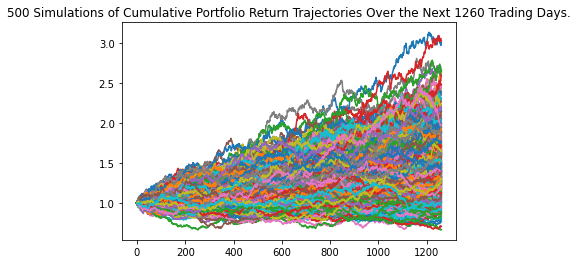

In [87]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_five = MC_fiveyear.plot_simulation()

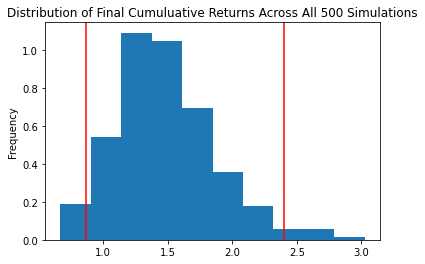

In [88]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_five = MC_fiveyear.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.481523
std               0.384597
min               0.666924
25%               1.227252
50%               1.433935
75%               1.691327
max               3.026026
95% CI Lower      0.868843
95% CI Upper      2.399741
Name: 1260, dtype: float64


In [91]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52130.56 and $143984.47


### Ten Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [93]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996774,0.995537,1.001059,0.993936,0.994153,1.001029,1.015545,0.996140,1.011214,0.991597,...,0.998372,1.000918,1.010510,1.000227,0.997839,1.000664,1.018773,1.005185,1.005490,0.998146
2,0.996581,0.991489,0.994685,0.995878,0.991006,0.999450,1.020628,0.996186,1.016020,0.994438,...,0.999831,1.004670,1.012234,0.999263,1.009376,1.005356,1.019773,1.009249,0.996836,0.989134
3,0.991105,1.004986,0.995579,0.991569,0.998315,0.994530,1.024972,1.010700,1.014782,0.998708,...,0.992589,0.999447,1.014298,0.998390,1.010384,1.011150,1.021828,0.998273,0.988687,0.981254
4,0.978947,1.016924,1.015359,0.977282,0.991420,0.997306,1.022975,1.025115,1.006996,0.990159,...,1.001321,0.999333,1.016855,0.999646,1.013792,1.028488,1.033792,0.996223,0.995456,0.993175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.217258,2.898787,1.670358,1.429300,1.051459,2.794624,1.391688,2.031784,2.576684,2.682045,...,3.656284,3.001004,1.780469,2.972450,1.690416,2.087295,2.901648,3.150675,2.815031,2.886557
2517,3.227194,2.895300,1.677695,1.428123,1.053063,2.792896,1.400377,1.996877,2.581583,2.697866,...,3.661720,2.973045,1.788191,2.977294,1.688920,2.097014,2.937076,3.139322,2.815732,2.874279
2518,3.234196,2.898733,1.674725,1.416415,1.055927,2.787401,1.398123,1.998092,2.577707,2.698457,...,3.669633,2.948160,1.788067,2.979890,1.670192,2.119853,2.933680,3.171088,2.832042,2.894060
2519,3.221420,2.900319,1.663639,1.414335,1.050648,2.817223,1.373263,2.004798,2.596213,2.675189,...,3.647358,2.957712,1.783034,2.987155,1.680698,2.141183,2.920451,3.161973,2.840900,2.897847


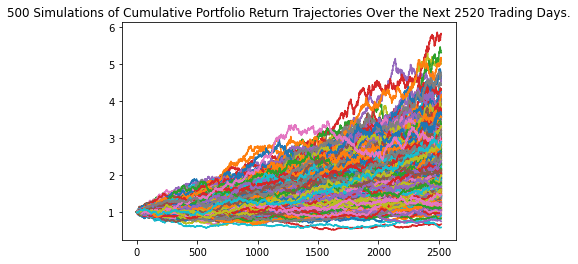

In [95]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_ten = MC_tenyear.plot_simulation()

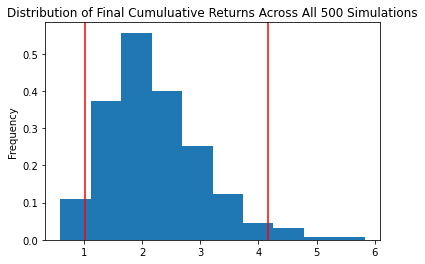

In [96]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_ten = MC_tenyear.plot_distribution()

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl_ten)

count           500.000000
mean              2.222150
std               0.822464
min               0.588487
25%               1.614274
50%               2.093657
75%               2.673645
max               5.829441
95% CI Lower      1.020171
95% CI Upper      4.162463
Name: 2520, dtype: float64


In [98]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $52130.56 and $143984.47
